# Winters, Alexander (V00970263)
# Music Recommendation System Part 2

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import pandas as pd
import time

## Import Datasets

In [52]:
# Songs
catalog_df = pd.read_csv('catalog_tracks.csv')
user_df1 = pd.read_csv('playlist_one_tracks.csv')
user_df2 = pd.read_csv('playlist_two_tracks.csv')

# Artists
artists_catalog_df = pd.read_csv('catalog_artists.csv')
artists_user_df1 = pd.read_csv('playlist_one_artists.csv')
artists_user_df2 = pd.read_csv('playlist_two_artists.csv')

In [5]:
print(catalog_df.info())
print("\n")
print(user_df1.info())
print("\n")
print(user_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
catalog_df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [54]:
catalog_df['release_date'] = pd.to_datetime(catalog_df['release_date'])

catalog_df.drop(catalog_df[catalog_df['release_date'] < '1960-01-01'].index, inplace=True)
catalog_df.drop('explicit', axis=1,  inplace=True)

## Visualize Dataset Features

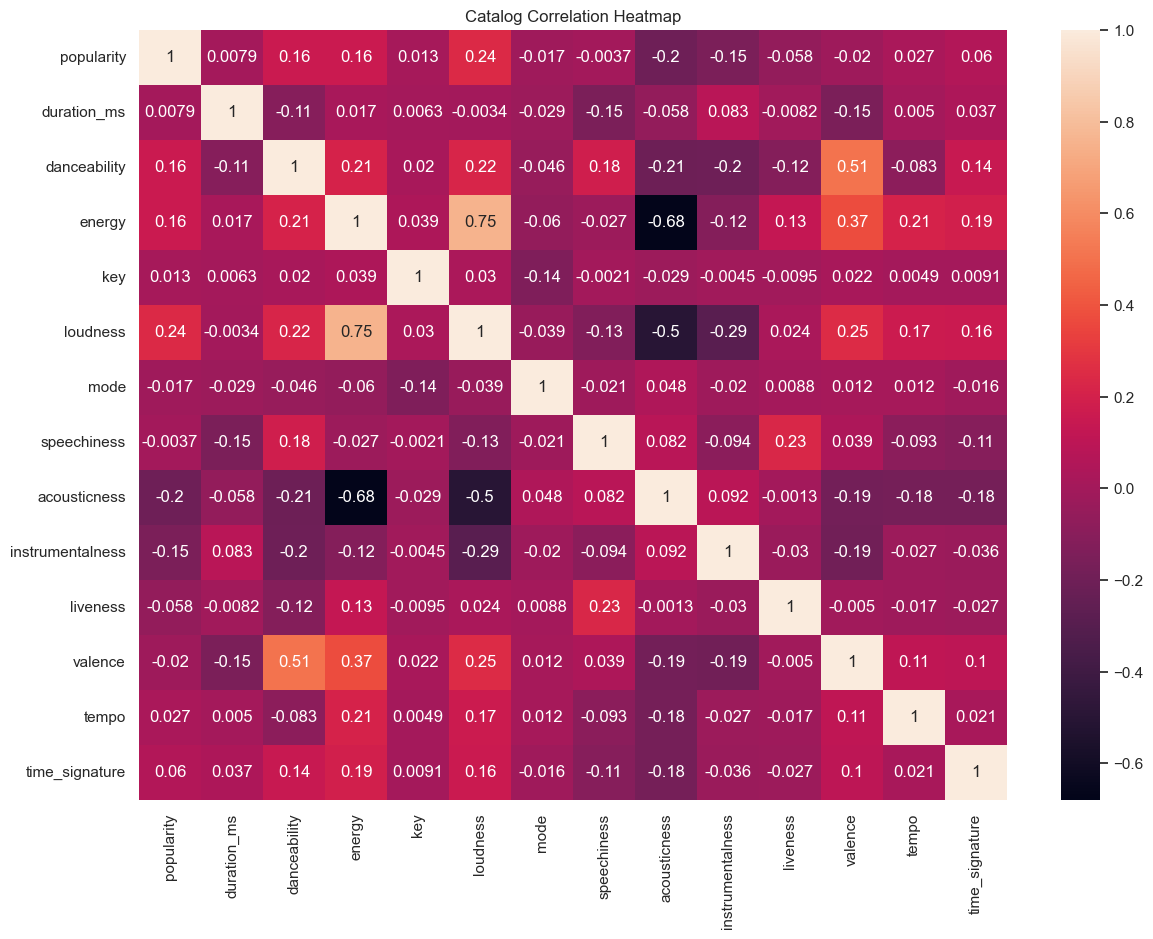

In [21]:
sns.set(rc={'figure.figsize': (14, 10)})
ax = sns.heatmap(catalog_df.corr(numeric_only=True), annot=True)
ax.set(title='Catalog Correlation Heatmap')

plt.show()

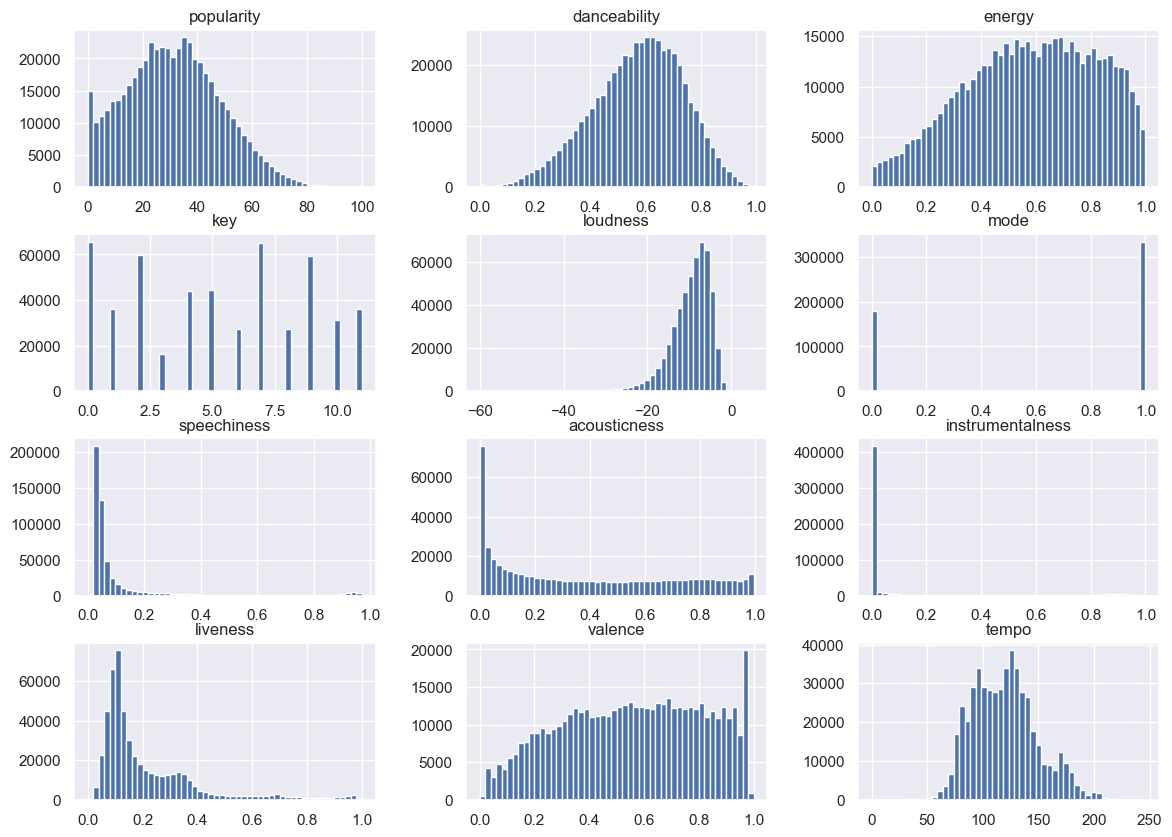

In [12]:
catalog_df[['popularity',
               'danceability',
               'energy',
               'key',
               'loudness',
               'mode',
               'speechiness',
               'acousticness',
               'instrumentalness',
               'liveness',
               'valence',
               'tempo'
              ]].hist(bins=50, figsize=(14, 10))

plt.show()

In [13]:
cluster_cols = ['danceability',
               'energy',
               'loudness',
               'speechiness',
               'acousticness',
               'instrumentalness',
               'liveness',
               'valence',
               'tempo'
               ]

## Normalize Data w/ MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Scale the music catalog
scaler = MinMaxScaler()
scaled_catalog = scaler.fit_transform(catalog_df[cluster_cols])

# Scale user playlists
scaled_user_1 = scaler.fit_transform(user_df1[cluster_cols])
scaled_user_2 = scaler.fit_transform(user_df2[cluster_cols])

In [18]:
scaled_cluster_cols = ['scaled_danceability',
               'scaled_energy',
               'scaled_loudness',
               'scaled_speechiness',
               'scaled_acousticness',
               'scaled_instrumentalness',
               'scaled_liveness',
               'scaled_valence',
               'scaled_tempo'
               ]
scaled_catalog_df = pd.DataFrame(scaled_catalog, columns=scaled_cluster_cols)

scaled_user_df1 = pd.DataFrame(scaled_user_1, columns=scaled_cluster_cols)
scaled_user_df2 = pd.DataFrame(scaled_user_2, columns=scaled_cluster_cols)

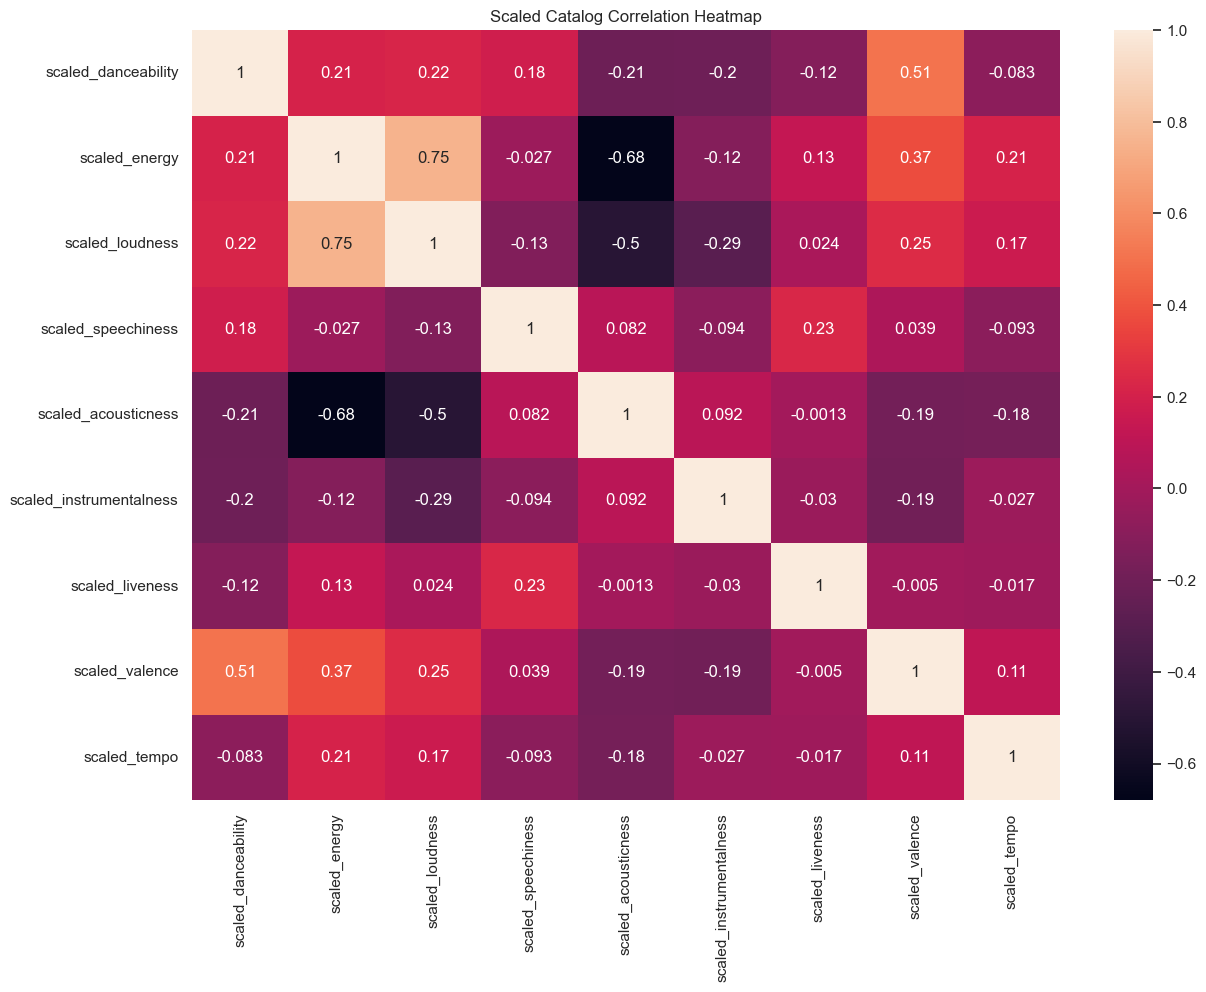

In [19]:
ax = sns.heatmap(scaled_catalog_df.corr(numeric_only=True), annot=True)
ax.set(title='Scaled Catalog Correlation Heatmap')

plt.show()

## Train Music Catalog w/ K-Means

In [29]:
# Using a better cluster metric than the elbow-method
# https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6

from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

In [34]:
n_clusters = range(2, 23)
ssd = []
scores = []
start_time = time.time()
for k in n_clusters:
    iter_time = time.time()
    kmeans = MiniBatchKMeans(n_clusters=k,
                             init='k-means++',
                             max_iter=20,
                             batch_size=4096,
                            ).fit(scaled_catalog)
    
    prediction = kmeans.predict(scaled_catalog)
    centers = kmeans.cluster_centers_
    ssd.append(kmeans.inertia_)
    s_score = silhouette_score(scaled_catalog, prediction, metric='euclidean')
    scores.append(s_score)
    print("Cluster: {} - Silhouette Score: {} - Time: {:.2f}m".format(k, s_score, ((time.time() - iter_time) / 60)))
print("Total Time: {:.2f}m".format((time.time() - start_time) / 60))

Cluster: 2 - Silhouette Score: 0.28981853103819627 - Time: 32.257790m
Cluster: 3 - Silhouette Score: 0.3059046731268602 - Time: 32.535851m
Cluster: 4 - Silhouette Score: 0.18717404041989977 - Time: 30.721883m
Cluster: 5 - Silhouette Score: 0.19553890221271314 - Time: 30.566308m
Cluster: 6 - Silhouette Score: 0.21322660363426965 - Time: 31.464598m
Cluster: 7 - Silhouette Score: 0.16584102693176125 - Time: 31.090348m
Cluster: 8 - Silhouette Score: 0.21036730353093308 - Time: 31.043275m
Cluster: 9 - Silhouette Score: 0.19824142637333167 - Time: 30.699686m
Cluster: 10 - Silhouette Score: 0.19788438085163734 - Time: 30.270619m
Cluster: 11 - Silhouette Score: 0.1749951340613989 - Time: 30.216301m
Cluster: 12 - Silhouette Score: 0.17296966317827214 - Time: 29.813622m
Cluster: 13 - Silhouette Score: 0.186633980753116 - Time: 30.010255m
Cluster: 14 - Silhouette Score: 0.1683822549868317 - Time: 29.754216m
Cluster: 15 - Silhouette Score: 0.1631063461086117 - Time: 29.370516m
Cluster: 16 - Silhou

### Plot Sihouette Score and Elbow-Method

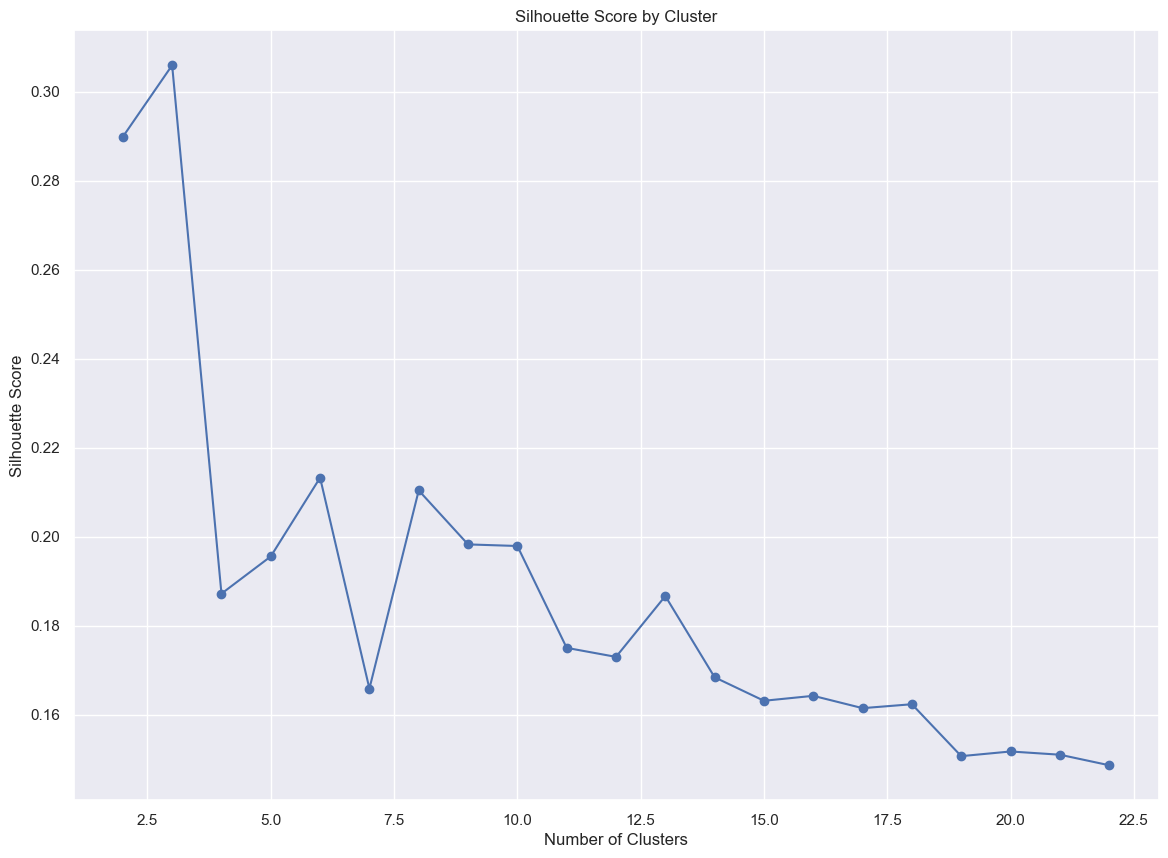

In [44]:
plt.plot(n_clusters, scores, marker='.', markersize=12)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Cluster')

plt.show()

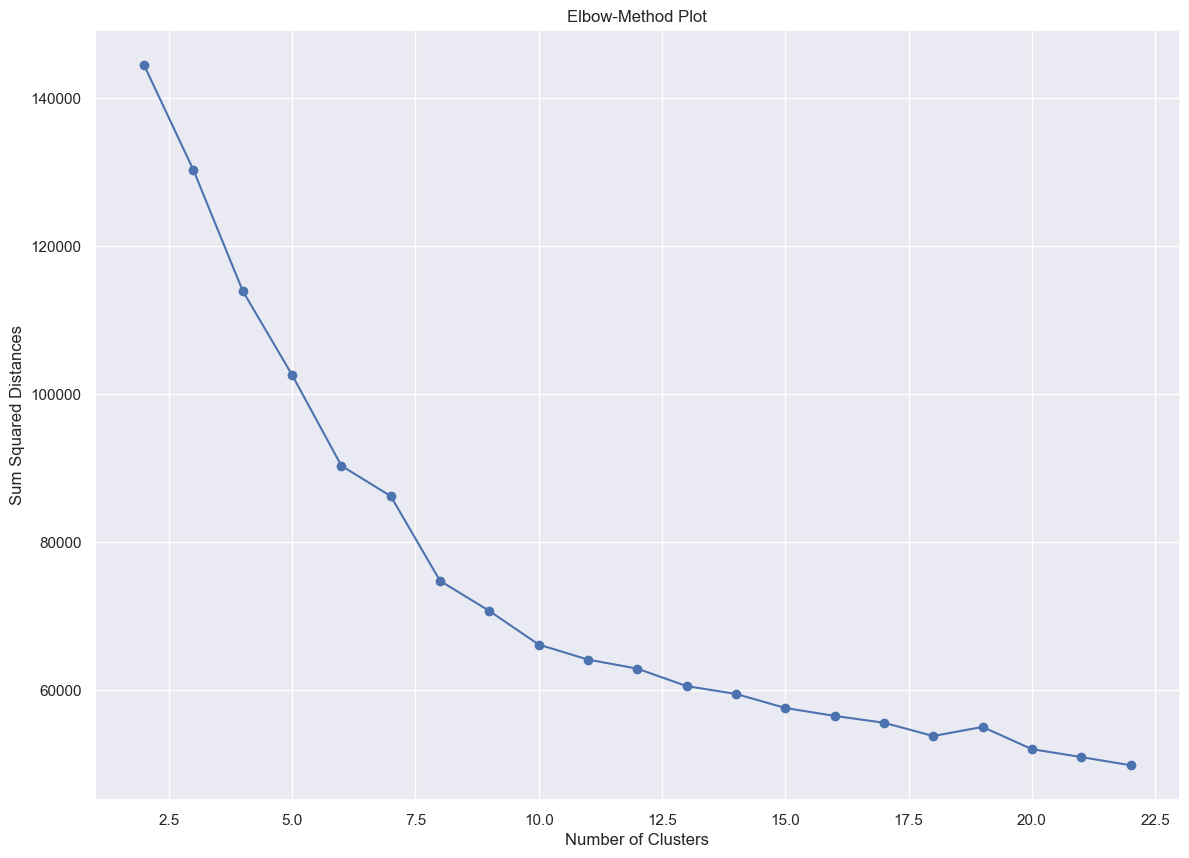

In [45]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Distances')
plt.title('Elbow-Method Plot')

plt.show()

### Best K-Means Clustering Model

In [47]:
# It appears that the best number of k is 8
k = 8

kmeans_clustering = MiniBatchKMeans(n_clusters=k,
                                    init='k-means++',
                                    max_iter=100,
                                    batch_size=4096
                                   ).fit(scaled_catalog)

y_pred = kmeans_clustering.predict(scaled_catalog)

### Visualizing and Retrieving Cluster Information

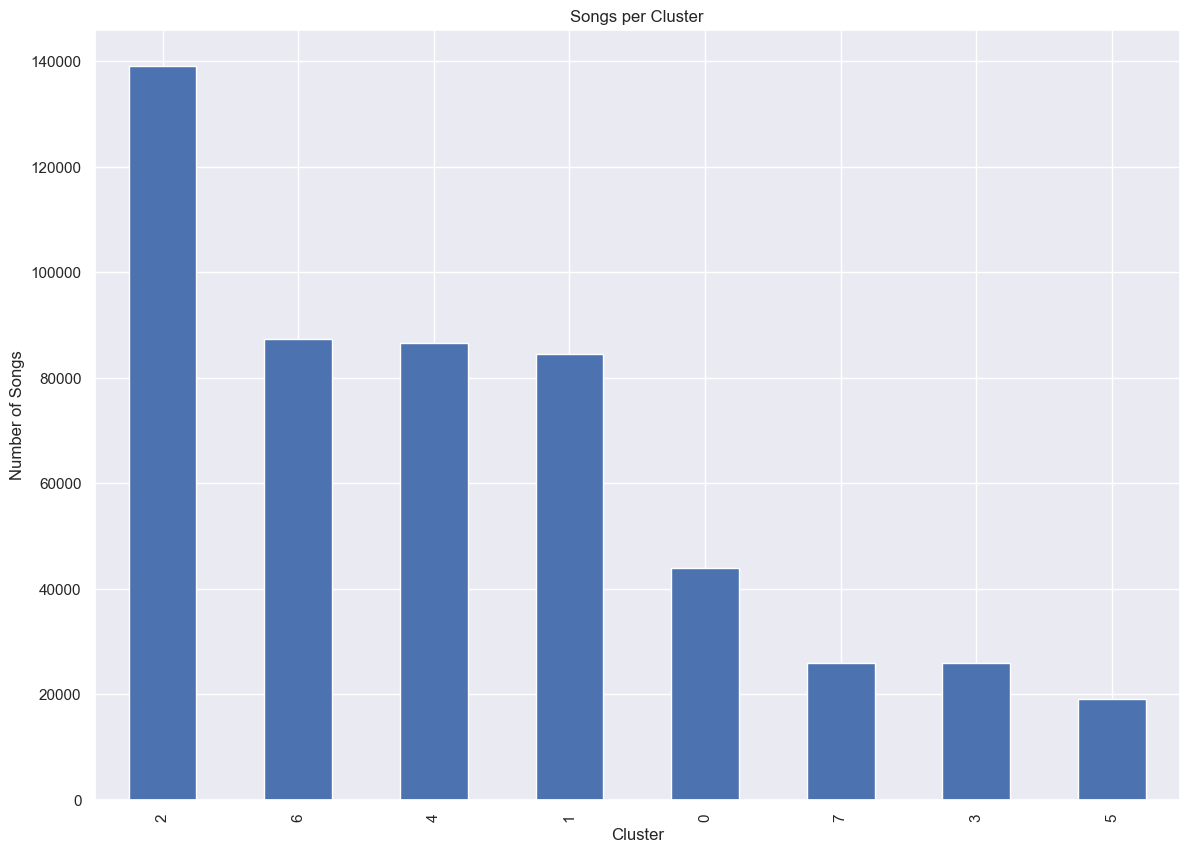

In [49]:
scaled_catalog_df['cluster'] = kmeans_clustering.labels_

scaled_catalog_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Songs per Cluster')

plt.show()

In [111]:
scaled_catalog_df['cluster'].value_counts()

2    139029
6     87291
4     86647
1     84523
0     43983
7     26017
3     25947
5     19175
Name: cluster, dtype: int64

In [67]:
concat_catalog_df = pd.concat([catalog_df, scaled_catalog_df], axis=1).set_index('cluster')

### Sampling Songs from Each Cluster

In [171]:
for cluster in range(k):
    display(concat_catalog_df.loc[cluster, ['name', 'artists']].sample(frac=1).head(10))

,name,artists
cluster,,
0.0,Lovin' You More Every Day,['Etta James']
0.0,Al Mirarte a Ti,['Majo y Dan']
0.0,Fırtına Ve Şimşek,['Sagopa Kajmer']
0.0,Love Will Find A Way,['Pablo Cruise']
0.0,Corazon de roca,['La Rondalla De Saltillo']
0.0,"Bajo el mar - de ""La Sirenita""/Banda Sonora Or...","['Vincente Borland', 'Coro - La Sirenita']"
0.0,I fought the law (Live),['Mano Negra']
0.0,Aynalar,['Salim Dündar']
0.0,Struggle,['The Gladiators']


,name,artists
cluster,,
1.0,Solitare,['Sissel']
1.0,All The Time,"['Jeremih', 'Lil Wayne', 'Natasha Mosley']"
1.0,NaN,NaN
1.0,NaN,NaN
1.0,Hele Hele Gel,['Aziz Azmet']
1.0,NaN,NaN
1.0,NaN,NaN
1.0,I Don't Dance - Live At Berlin Wuhlheide / 2015,['Sunrise Avenue']
1.0,Flames Of Love,['Fancy']


,name,artists
cluster,,
2.0,Se Tambalea,['Grupo Pegasso']
2.0,Good Times Boogie,['John Mayall']
2.0,Čierna ruža,"['Pavol Hammel', 'Prúdy']"
2.0,NaN,NaN
2.0,NaN,NaN
2.0,Roll Up And Shine,['Stereophonics']
2.0,"Monday Morning - Live at The Fabulous Forum, I...",['Fleetwood Mac']
2.0,NaN,NaN
2.0,Travesura,['Sonora Cumanacao']


,name,artists
cluster,,
3.0,NO FUI YO,['Ak4:20']
3.0,The Phoenix (FSOE 650 Anthem) [Mixed],"['Philippe El Sisi', 'Omar Sherif']"
3.0,שיר ערש לצבעים,['Nechama Hendel']
3.0,Clave 7,['Grupo Laberinto']
3.0,Gigi,['Eddie Fisher']
3.0,It's So Easy,"[""Guns N' Roses""]"
3.0,NaN,NaN
3.0,Red Nation,"['The Game', 'Lil Wayne']"
3.0,NaN,NaN


,name,artists
cluster,,
4.0,Kapitel 21 - Auf dem Hexenberg (Folge 018),['Bibi Blocksberg']
4.0,La légende Black (feat. Dr. Beriz),"['Black M', 'Dr. Beriz']"
4.0,NaN,NaN
4.0,How You Like Me Now,['The Heavy']
4.0,Drive Around The City - Original Mix,['James Johnston']
4.0,幸福快樂伴著你,['凌雅']
4.0,Adaletin Bu Mu Dünya,['Koray Avcı']
4.0,Falling,['Chase Atlantic']
4.0,יאסו,"['Eden Ben Zaken', 'Static & Ben El', 'Stephan..."


,name,artists
cluster,,
5.0,Ősember,['Gryllus Vilmos']
5.0,Ben Küskünüm Feleğe,['Hamiyet Yüceses']
5.0,Moravski biser,['Borko Radivojevic']
5.0,Homanaje,"['Manuel de Falla', 'John Williams']"
5.0,Lá Fora,['Ave Sangria']
5.0,Kiss My Name - Live,['Antony and the Johnsons']
5.0,5000 de Zile,['B.U.G. Mafia']
5.0,Sensizliğin Yeri Bomboş,['Engin Nursani']
5.0,Selly Punker,['Last Child']


,name,artists
cluster,,
6.0,小螞蟻,"['吳爾笠', '楊仲豪', '蔡榮吉', '許鈺珮']"
6.0,Enamorao (Live Version),['Ilegales']
6.0,Veikko Nieminen,['Tapani Kansa']
6.0,Brasil,['Tronic']
6.0,No Me Mientas,['William Luna']
6.0,Come Online,['Kid Francescoli']
6.0,NaN,NaN
6.0,NaN,NaN
6.0,每當想起你,['Frances Yip']


,name,artists
cluster,,
7.0,Good Golly Miss Molly,['Creedence Clearwater Revival']
7.0,你約我在夏天見面,['Yuki Hsu']
7.0,Still Take You Home,['Arctic Monkeys']
7.0,Prophecy Theme,"['TOTO', 'Brian Eno', 'Daniel Lanois']"
7.0,Menina estás à janela - Live,['Rio Grande']
7.0,Ho Visto Un Prato,['Sergio Endrigo']
7.0,Little Ghetto Boy,['Donny Hathaway']
7.0,Männer mit Bärten,['Die Streuner']
7.0,La Inconforme,['Diomedes Diaz']


## Visualize Features by Cluster

In [72]:
# Make it easier to plot radar charts
rename_columns = dict(zip(scaled_cluster_cols, cluster_cols))

radar_df = scaled_catalog_df.groupby('cluster')[scaled_cluster_cols].mean().reset_index().rename(columns=rename_columns)

In [94]:
# Source below
#https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart

def make_spider(row, title, color):

    # number of variable
    categories=list(radar_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2, 4, row+1, polar=True,)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4", "0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values = radar_df.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)


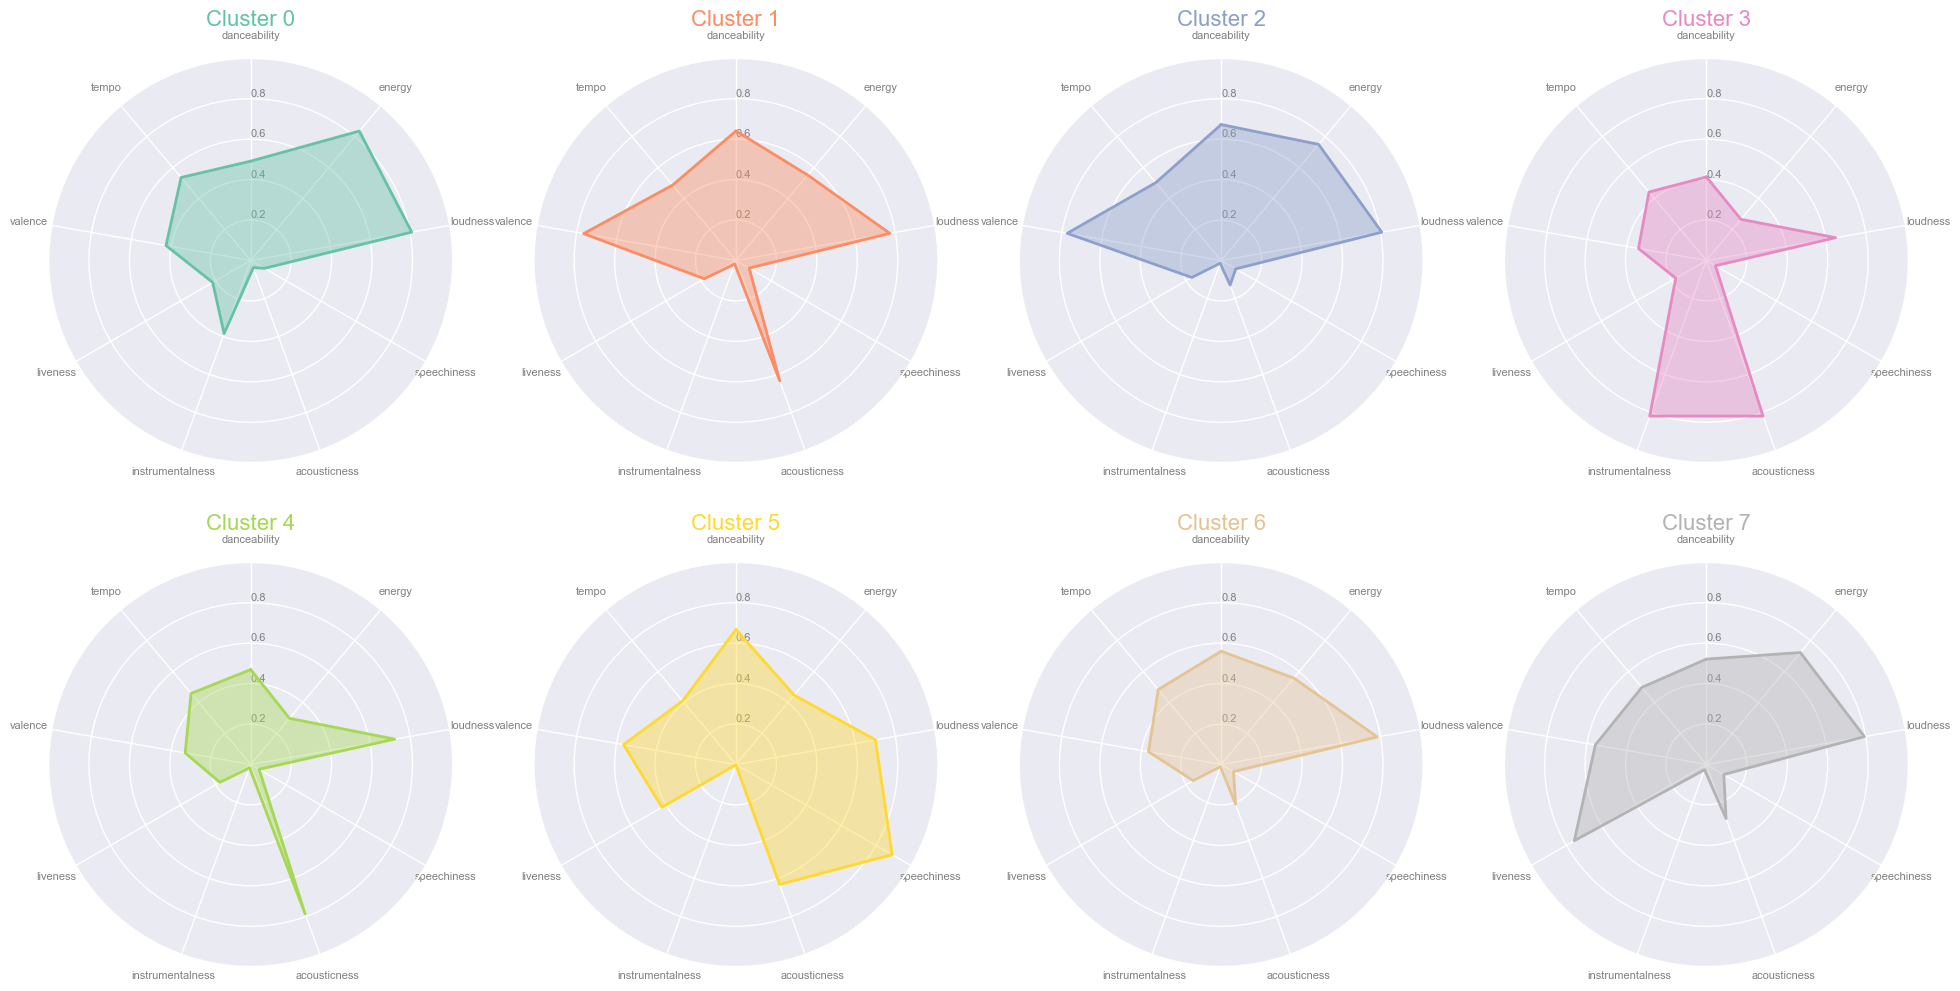

In [107]:
# ------- PART 2: Apply the function to all individuals
# initialize the figure

plt.figure(figsize=(24, 12))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar_df.index))
 
# Loop to plot
for row in range(0, len(radar_df.index)):
    make_spider(row=row, title='Cluster ' + str(radar_df['cluster'][row]), color=my_palette(row))

## Visualizing Clusters w/ PCA

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=3)
catalog_pca = pca.fit_transform(scaled_catalog)
print(pca.explained_variance_ratio_.sum())

0.7006350981703907


In [110]:
pca_catalog_df = pd.DataFrame(catalog_pca, columns=['C1', 'C2', 'C3'])
pca_catalog_df['cluster'] = kmeans_clustering.labels_

In [112]:
# Undersample Clusters
# min value count in cluster = 19175
sampled_pca_clusters = pd.DataFrame()

for c in pca_catalog_df['cluster'].unique():
    sampled_pca_clusters_df = pca_catalog_df[pca_catalog_df['cluster'] == c ].sample(n=19175)
    sampled_pca_clusters = pd.concat([sampled_pca_clusters, sampled_pca_clusters_df], axis=0)

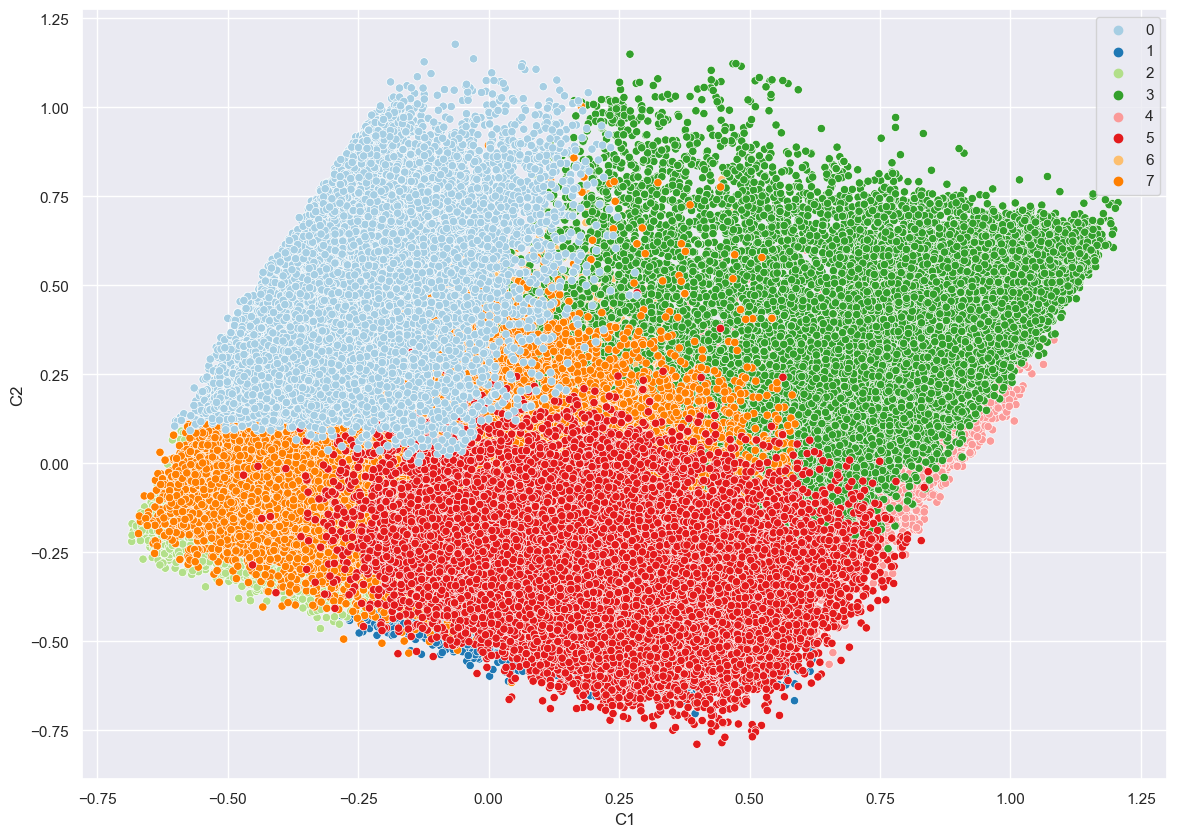

In [119]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_pca_clusters, legend='full', palette='Paired')
plt.legend()

plt.show()

## Predicting User Clusters

In [120]:
pred_user_1 = kmeans_clustering.predict(scaled_user_1)
pred_user_2 = kmeans_clustering.predict(scaled_user_2)

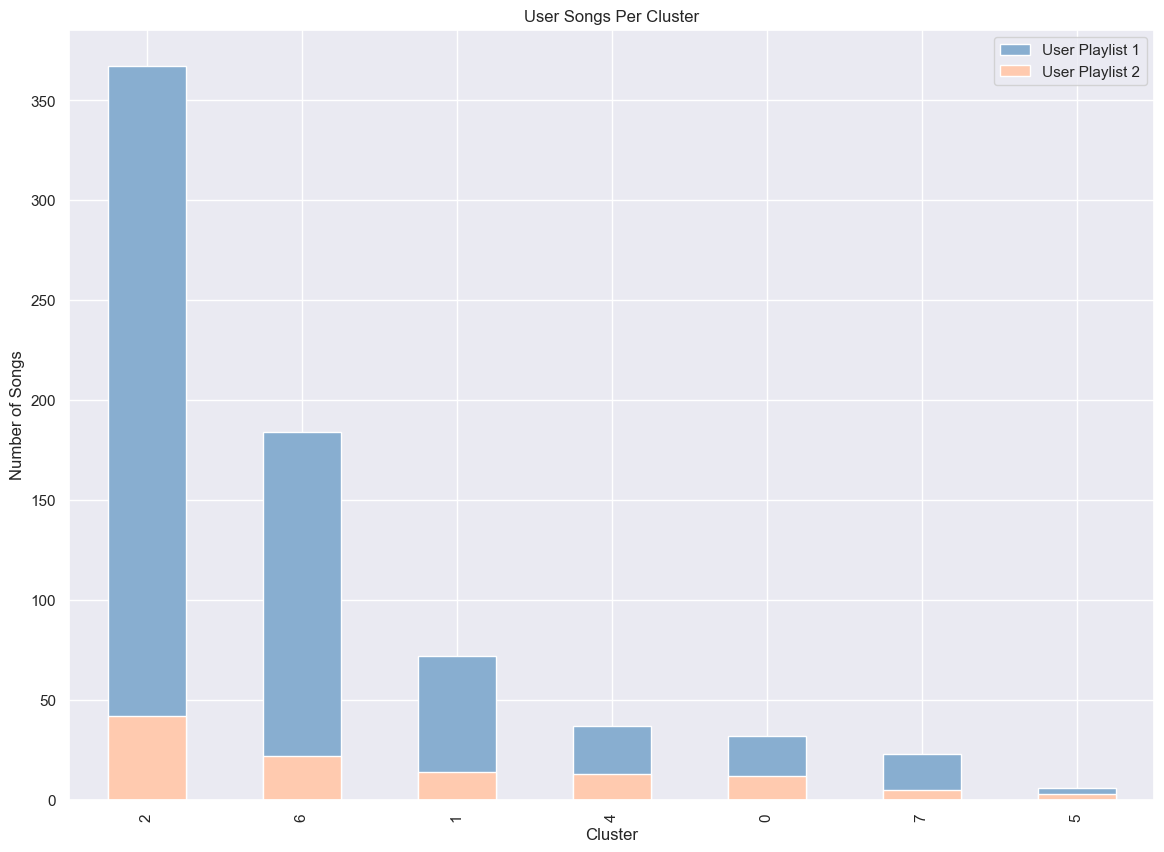

In [210]:
cluster_user_1 = pd.DataFrame(scaled_user_1, columns=scaled_cluster_cols)
cluster_user_1['cluster'] = pred_user_1

cluster_user_2 = pd.DataFrame(scaled_user_2, columns=scaled_cluster_cols)
cluster_user_2['cluster'] = pred_user_2

# Plot
cluster_user_1['cluster'].value_counts().plot(kind='bar', color='#88aed0', label='User Playlist 1')
cluster_user_2['cluster'].value_counts().plot(kind='bar', color='#ffcaaf', label='User Playlist 2')

plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('User Songs Per Cluster')
plt.legend()


plt.show()

In [211]:
print(cluster_user_1['cluster'].value_counts())
print('\n')
print(cluster_user_2['cluster'].value_counts())

6    367
2    184
0     72
1     37
7     32
4     23
5      6
3      2
Name: cluster, dtype: int64


2    42
6    22
1    14
4    13
0    12
7     5
5     3
Name: cluster, dtype: int64


In [212]:
concat_user_df1 = pd.concat([user_df1, cluster_user_1], axis=1).set_index('cluster')
concat_user_df2 = pd.concat([user_df2, cluster_user_2], axis=1).set_index('cluster')

# Print samples from each cluster
for cluster in range(k):
    try:
        print("\nUser DF1")
        display(concat_user_df1.loc[cluster, ['name', 'artists']].sample(frac=1).head(5))
        print("\nUser DF2")
        display(concat_user_df2.loc[cluster, ['name', 'artists']].sample(frac=1).head(5))
    except KeyError:
        continue


User DF1


,name,artists
cluster,,
0,For You feat. Delora - Original Mix,Delora
0,Fire In Me - Sigala Remix,Sigala
0,Going Under,Loud Luxury
0,Chemicals,Thomas Troelsen
0,Desire - Gryffin Remix,Gryffin



User DF2


,name,artists
cluster,,
0,Bobcaygeon,The Tragically Hip
0,Layla,Derek & The Dominos
0,Born in the U.S.A.,Bruce Springsteen
0,Free Bird,Lynyrd Skynyrd
0,Snow (Hey Oh),Red Hot Chili Peppers



User DF1


,name,artists
cluster,,
1,Perfect Strangers,JP Cooper
1,Closer,Halsey
1,California,Brynn Elliott
1,I Feel It Coming,Daft Punk
1,All Falls Down (feat. Juliander),Juliander



User DF2


,name,artists
cluster,,
1,Come On Eileen,Dexys Midnight Runners
1,American Girl,Tom Petty and the Heartbreakers
1,Everywhere - 2017 Remaster,Fleetwood Mac
1,Lola,The Kinks
1,Never Going Back Again - 2004 Remaster,Fleetwood Mac



User DF1


,name,artists
cluster,,
2,Not the One,Kaii Dreams
2,More Mess,Coely
2,Dreamer,Axwell /\ Ingrosso
2,Something Strange,Haley Reinhart
2,Deep End (feat. JHart) - Eden Prince Remix,Eden Prince



User DF2


,name,artists
cluster,,
2,Beat It,Michael Jackson
2,Edge of Seventeen - 2016 Remaster,Stevie Nicks
2,Stuck In The Middle With You,Stealers Wheel
2,Magic Carpet Ride,Steppenwolf
2,Bad Moon Rising,Creedence Clearwater Revival



User DF1


,name,artists
cluster,,
3,Warm,SG Lewis
3,Punga,Klingande



User DF2

User DF1


,name,artists
cluster,,
4,Carry Me (feat. Julia Michaels),Julia Michaels
4,Bad Timing (with loren north),loren north
4,"Survive (feat. Emeli Sandé, Gucci Mane)",Gucci Mane
4,Killing Time,Felix Cartal
4,I Wanna Know,Daya



User DF2


,name,artists
cluster,,
4,American Pie,Don McLean
4,Landslide,Fleetwood Mac
4,Goodbye Yellow Brick Road - Remastered 2014,Elton John
4,Piano Man,Billy Joel
4,Like a Rolling Stone,Bob Dylan



User DF1


,name,artists
cluster,,
5,Runaway,ChianoSky
5,I Like Me Better,Lauv
5,Eastside (with Halsey & Khalid),Khalid
5,Gold,Kiiara
5,Comfortable - JYYE Remix,JYYE



User DF2


,name,artists
cluster,,
5,I'm Still Standing,Elton John
5,I Shot The Sheriff,The Wailers
5,Sympathy For The Devil - 50th Anniversary Edition,The Rolling Stones



User DF1


,name,artists
cluster,,
6,"Carry On (from the Original Motion Picture ""PO...",Rita Ora
6,If It Wasn't For You,Alesso
6,Me,Conro
6,Don't Let Me Down,Daya
6,While We’re Dreaming,Kevin Writer



User DF2


,name,artists
cluster,,
6,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John
6,Gimme Shelter,The Rolling Stones
6,Rebel Rebel - 2016 Remaster,David Bowie
6,Live And Let Die - 2018 Remaster,Wings
6,Scar Tissue,Red Hot Chili Peppers



User DF1


,name,artists
cluster,,
7,Villain,valentina cy
7,Nights With You - Cheat Codes Remix,Cheat Codes
7,You Know,Damaui
7,Thing For You - Don Diablo Remix,Don Diablo
7,Voices (feat. Najja),Najja



User DF2


,name,artists
cluster,,
7,Uptown Girl,Billy Joel
7,Bennie And The Jets - Remastered 2014,Elton John
7,Don't Stop Me Now - Remastered 2011,Queen
7,The Passenger,Iggy Pop
7,Thriller,Michael Jackson


## Song Recommendations

In [213]:
concat_user_df1.reset_index(inplace=True)
concat_user_df2.reset_index(inplace=True)

df1_cluster_pct = concat_user_df1['cluster'].value_counts(normalize=True) * 25
df2_cluster_pct = concat_user_df2['cluster'].value_counts(normalize=True) * 15

if int(df1_cluster_pct.round(0).sum()) < 25:
    df1_cluster_pct[df1_cluster_pct < 0.5] = df1_cluster_pct[df1_cluster_pct < 0.5] + 1.

if int(df2_cluster_pct.round(0).sum()) < 15:
    df2_cluster_pct[df2_cluster_pct < 0.5] = df2_cluster_pct[df2_cluster_pct < 0.5] + 1.

print("\nUser DF1")
print(df1_cluster_pct)
print("Total Songs DF1: {}".format(int(df1_cluster_pct.round(0).sum())))
print("\nUser DF2")
print(df2_cluster_pct)
print("Total Songs DF2: {}".format(int(df2_cluster_pct.round(0).sum())))
  


User DF1
6    12.690180
2     6.362379
0     2.489627
1     1.279391
7     1.106501
4     0.795297
5     1.207469
3     1.069156
Name: cluster, dtype: float64
Total Songs DF1: 26

User DF2
2    5.675676
6    2.972973
1    1.891892
4    1.756757
0    1.621622
7    0.675676
5    0.405405
Name: cluster, dtype: float64
Total Songs DF2: 16


In [223]:
concat_catalog_df.dropna(axis=0, inplace=True)
concat_catalog_df.reset_index(inplace=True)

In [224]:
# Add cluster percentage to dataframe
concat_user_df1['cluster_pct'] = concat_user_df1['cluster'].apply(lambda c: df1_cluster_pct[c])
concat_user_df2['cluster_pct'] = concat_user_df2['cluster'].apply(lambda c: df2_cluster_pct[c])

In [225]:
playlist1 = pd.DataFrame()

for cluster, pct in df1_cluster_pct.items():
    songs = concat_catalog_df[concat_catalog_df['cluster'] == cluster].sample(n=int(round(pct, 0)))
    playlist1 = pd.concat([playlist1, songs], ignore_index=True)
    if len(playlist1) > 25:
        flag = 25 - len(playlist1)
        playlist1 = playlist1[:flag]

playlist1.head(5)

,level_0,index,cluster,id,name,popularity,duration_ms,artists,id_artists,release_date,...,time_signature,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,257209,257209,6.0,1Go3uEs00lMezuiyaKxewM,Við,3.0,220497.0,['Trúbrot'],['01w8eDOz2L9SFgv1ukZPRv'],1969-01-01,...,4.0,0.721493,0.576,0.779537,0.049743,0.064056,0.000002,0.140,0.128,0.487111
1,156649,156649,6.0,6AqUc6gxgNDxS7hPCVdxDk,Carmen: El Dolor,23.0,290307.0,['Dolores Delirio'],['2VgyvIB7rkMHJLzkMtUOSI'],1998-06-30,...,4.0,0.471241,0.612,0.802665,0.036148,0.289157,0.000000,0.317,0.645,0.388244
2,46646,46646,6.0,5d4YOlU2OrU9sMQe7M8qdW,"RTL (2006 Version, Leftovers Edit)",0.0,270464.0,['Ethnofobia'],['710WmJrfeU9A5JmwqwZT4Y'],2017-10-31,...,4.0,0.651867,0.576,0.780852,0.100824,0.148594,0.004490,0.377,0.521,0.803483
3,54660,54660,6.0,18wXeBuaTijjJWN9otFj7h,Too Soon To Know - Remastered 2015,10.0,167760.0,"['Roy Orbison', 'Alex Orbison', 'Chuck Turner']","['0JDkhL4rjiPNEp92jAgJnS', '1fprDBeCKrHSz3TZDi...",2015-10-23,...,3.0,0.595358,0.685,0.837983,0.029042,0.000066,0.000031,0.165,0.425,0.456249
4,173332,173332,6.0,6h0MucHGRZQvLqIPmGwDoV,Wetatwa,22.0,405840.0,['Girma Wolde Michael'],['2JDHhWIDxNEia3DnVNgKqt'],1994-01-01,...,4.0,0.342079,0.248,0.676487,0.035324,0.060944,0.001080,0.105,0.150,0.514439


In [226]:
playlist2 = pd.DataFrame()

for cluster, pct in df2_cluster_pct.items():
    songs2 = concat_catalog_df[concat_catalog_df['cluster'] == cluster].sample(n=int(round(pct, 0)))
    playlist2 = pd.concat([playlist2, songs2], ignore_index=True)
    if len(playlist2) > 15:
        flag = 15 - len(playlist2)
        playlist2 = playlist2[:flag]

playlist2.head(5)

,level_0,index,cluster,id,name,popularity,duration_ms,artists,id_artists,release_date,...,time_signature,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,88611,88611,2.0,1eKRJwNIz3sgKQP7uMxSdB,"Radetzky-Marsch, Op. 228",3.0,212360.0,"['Johann Strauss I', 'Nikolaus Harnoncourt', '...","['4WMHJgeJCssiGW3ssUT7eb', '0AeOzXbHJu8q2xqILE...",2003-01-01,...,4.0,0.685166,0.875,0.838886,0.353244,0.003976,0.000000,0.0905,0.466,0.605379
1,8743,8743,2.0,6Q0i9c5N8PbuA6fZT1SxKJ,Friends of Mine - Mono Version,34.0,137667.0,['The Zombies'],['2jgPkn6LuUazBoBk6vvjh5'],1968-04-19,...,4.0,0.858729,0.920,0.872048,0.207003,0.032028,0.000525,0.1280,0.545,0.383617
2,254649,254649,2.0,77hT6ZLuAERqb49Hel8CQY,Dybt Vand (feat. Nadia Malm & Joey Moe) - Akus...,28.0,248653.0,"['Svenstrup & Vendelboe', 'Nadia Malm', 'Joey ...","['434SxmL2g1j0tJfzewAJJS', '35ywVZkfTlMs9NtxIf...",2011-07-29,...,4.0,0.647830,0.834,0.868499,0.063955,0.114458,0.000000,0.0670,0.847,0.527748
3,166911,166911,2.0,2I9t0e3gLAKOi5syoHxP46,fue mejor,74.0,228602.0,"['Kali Uchis', 'PARTYNEXTDOOR']","['1U1el3k54VvEUzo3ybLPlM', '2HPaUgqeutzr3jx5a9...",2020-12-04,...,4.0,0.532795,0.961,0.871543,0.064058,0.018976,0.000000,0.3590,0.611,0.706114
4,418821,418821,2.0,4gX3nwxCUrwux9vmexWyBK,045 - und das Gold der Wikinger - Teil 14,35.0,69120.0,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1989-04-01,...,4.0,0.528759,0.812,0.863895,0.032853,0.322289,0.000000,0.0737,0.706,0.385464


In [230]:
cols = ['name', 'artists']

playlist1_songs = playlist1[cols]

display(playlist1_songs)

,name,artists
0,Við,['Trúbrot']
1,Carmen: El Dolor,['Dolores Delirio']
2,"RTL (2006 Version, Leftovers Edit)",['Ethnofobia']
3,Too Soon To Know - Remastered 2015,"['Roy Orbison', 'Alex Orbison', 'Chuck Turner']"
4,Wetatwa,['Girma Wolde Michael']
5,You Da One,['Rihanna']
6,บอดี้การ์ด,['เต๋า สมชาย เข็มกลัด']
7,"Les quatre saisons,L'été: Adagio","['Antonio Vivaldi', 'Orchestre de Chambre Nati..."
8,יפה אהבה,['Zohar Argov']
9,Cinco Ases,['Daniel Aranda']


In [231]:
playlist2_songs = playlist2[cols]
display(playlist2_songs)

,name,artists
0,"Radetzky-Marsch, Op. 228","['Johann Strauss I', 'Nikolaus Harnoncourt', '..."
1,Friends of Mine - Mono Version,['The Zombies']
2,Dybt Vand (feat. Nadia Malm & Joey Moe) - Akus...,"['Svenstrup & Vendelboe', 'Nadia Malm', 'Joey ..."
3,fue mejor,"['Kali Uchis', 'PARTYNEXTDOOR']"
4,045 - und das Gold der Wikinger - Teil 14,['Die drei ???']
5,2AM (feat. Carla Monroe),"['MK', 'Carla Monroe']"
6,שיר אהבה ישן,['Darom Duo']
7,O Kir Thanos,"['Grigoris Bithikotsis', 'Voula Gika']"
8,La Noche de Mi Mal,['José Alfredo Jimenez']
9,Arrabi al Arabe,['Mariem Hassan']


## Birch Clustering

In [374]:
from sklearn.cluster import Birch

In [375]:
scaled_catalog_df.dropna(axis=0, inplace=True)

In [376]:
scaled_sample_catalog_df = scaled_catalog_df.sample(200000, axis=0)

In [377]:
scaled_sample_catalog_df.drop('cluster', axis=1, inplace=True)

In [378]:
n_clusters = range(2, 11)
birch_scores = []
birch_time = time.time()
for k in n_clusters:
    birch_iter_time = time.time()
    brc = Birch(n_clusters=k).fit(scaled_sample_catalog_df)
    
    birch_pred = brc.predict(scaled_sample_catalog_df)
    #centers = kmeans.cluster_centers_
    #ssd.append(kmeans.inertia_)
    b_sil_score = silhouette_score(scaled_sample_catalog_df, birch_pred, metric='euclidean')
    birch_scores.append(b_sil_score)
    print("Clusters: {} - Silhouette Score: {} - Time: {:.2f}m".format(k, b_sil_score, ((time.time() - birch_iter_time) / 60)))
print("Total Time: {:.2f}m".format((time.time() - birch_time) / 60))

Clusters: 2 - Silhouette Score: 0.33420847786896274 - Time: 5.24m
Clusters: 3 - Silhouette Score: 0.2584346404811329 - Time: 5.25m
Clusters: 4 - Silhouette Score: 0.2506008123909218 - Time: 4.71m
Clusters: 5 - Silhouette Score: 0.26579748842872714 - Time: 4.70m
Clusters: 6 - Silhouette Score: 0.2590514337208419 - Time: 4.68m
Clusters: 7 - Silhouette Score: 0.25327944799813396 - Time: 4.74m
Clusters: 8 - Silhouette Score: 0.24344534453868535 - Time: 4.69m
Clusters: 9 - Silhouette Score: 0.24232534706278447 - Time: 4.69m
Clusters: 10 - Silhouette Score: 0.21418026287754677 - Time: 4.69m
Total Time: 43.39m


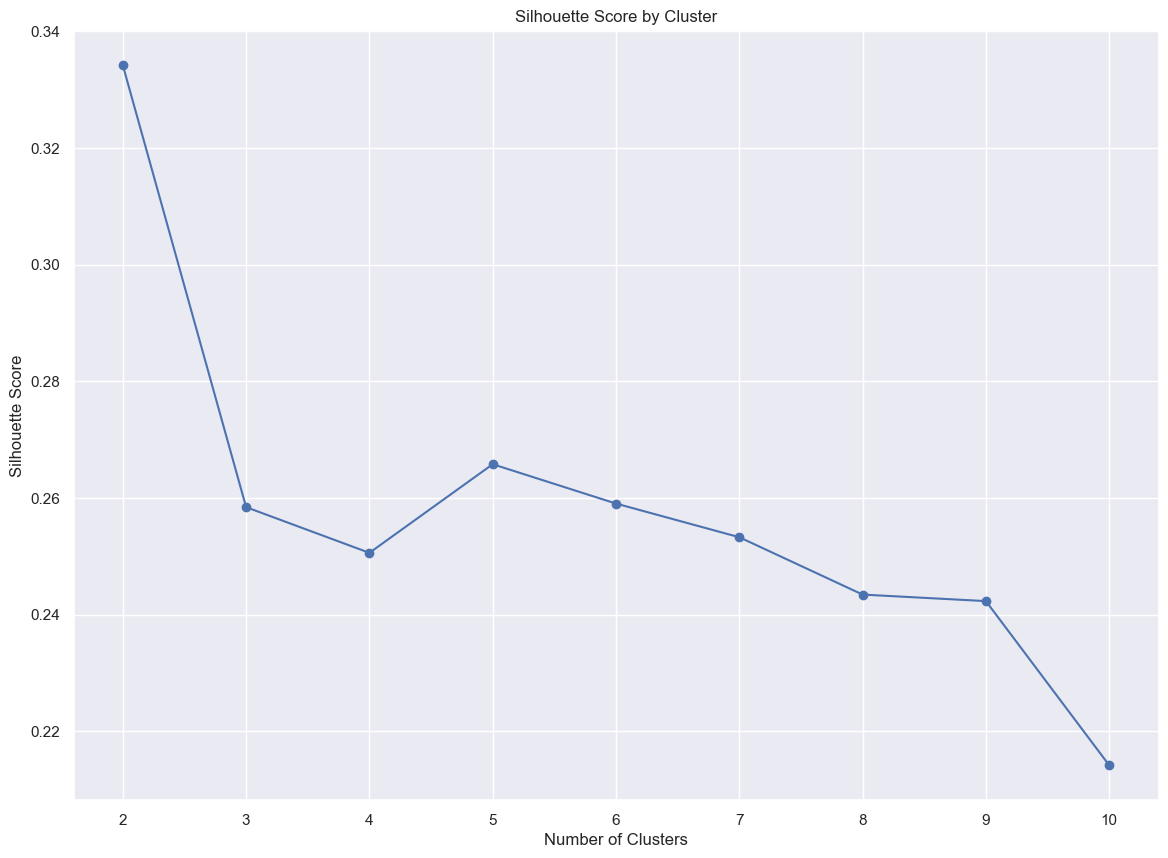

In [379]:
plt.plot(n_clusters, birch_scores, marker='.', markersize=12)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Cluster')

plt.show()

In [380]:
# 5 clusters appears to be the best again
birch_k = 5
birch_model = Birch(n_clusters=birch_k).fit(scaled_sample_catalog_df)

by_pred = birch_model.predict(scaled_sample_catalog_df)

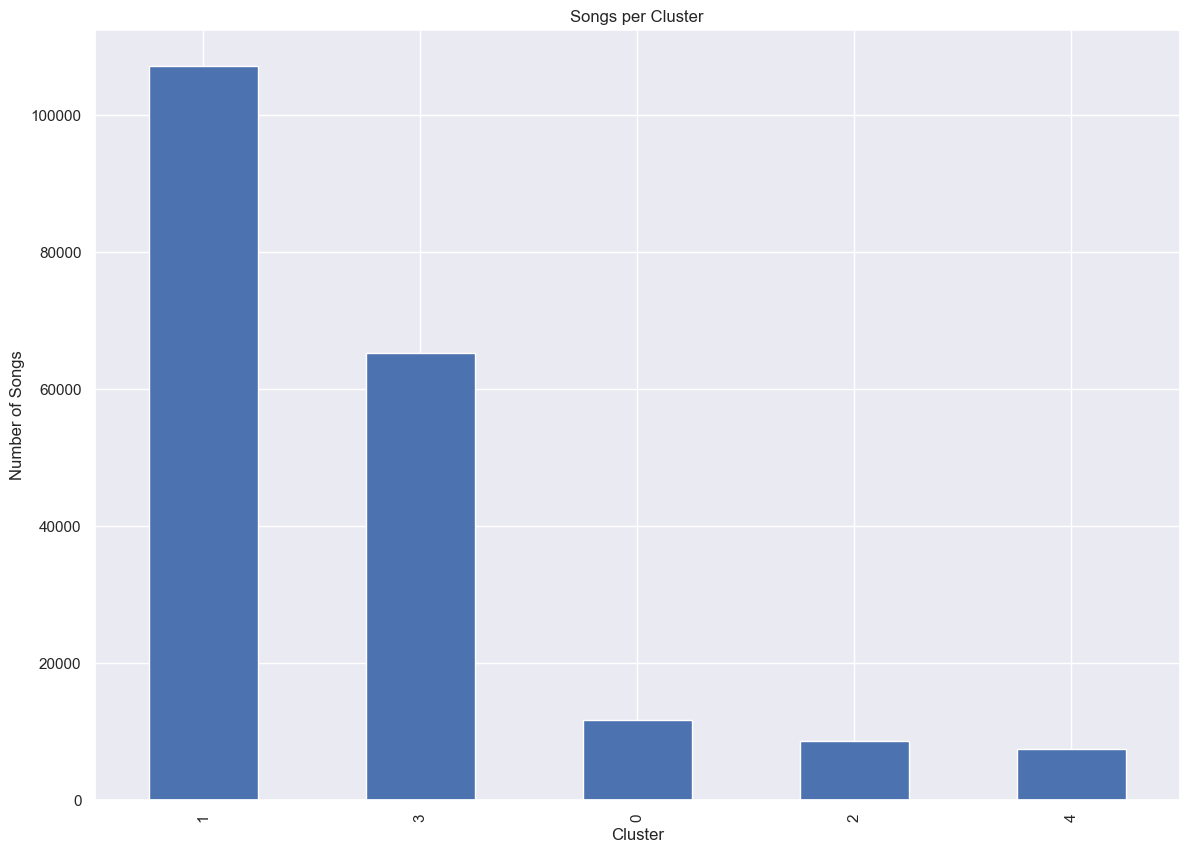

In [381]:
scaled_sample_catalog_df['cluster'] = birch_model.labels_

scaled_sample_catalog_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Songs per Cluster')

plt.show()

In [382]:
scaled_sample_catalog_df['cluster'].value_counts()

1    107129
3     65250
0     11595
2      8625
4      7401
Name: cluster, dtype: int64

In [383]:
sample_concat_catalog_df = pd.concat([catalog_df, scaled_sample_catalog_df], axis=1).set_index('cluster')

In [384]:
sample_concat_catalog_df.dropna(axis=0, inplace=True)

In [385]:
for cluster in range(birch_k):
    display(sample_concat_catalog_df.loc[cluster, ['name', 'artists']].sample(frac=1).head(10))

,name,artists
cluster,,
0.0,Kaleidoscope (Mix Cut),"['Airborn', 'Bogdan Vix', 'KeyPlayer']"
0.0,Sejengkal Tanah,['Mansyur S']
0.0,Mockingbird,"['Carly Simon', 'James Taylor']"
0.0,Angels On The Moon,['Thriving Ivory']
0.0,If It Ain't Funky,['Chuck Brown and the Soul Searchers']
0.0,Panama (Mixed),['Giuseppe Ottaviani']
0.0,Das Beste,['Silbermond']
0.0,Fearless,['Pink Floyd']
0.0,Barco de Papel / Homem de Pedra - Ao Vivo,"['O Trio do Brasil', 'Di Paullo', 'Paulino']"


,name,artists
cluster,,
1.0,De Roos,['Ann Christy']
1.0,Quiero Pan,['Xuxa']
1.0,When Poets Dreamed Of Angels,['David Sylvian']
1.0,Our Day Will Come,['Ruby And The Romantics']
1.0,A Night Like This [ASOT 541] - Original Mix,['Kyau & Albert']
1.0,Méditation de Thaïs,"['Jules Massenet', 'Julian Lloyd Webber', 'Roy..."
1.0,Bron-Yr-Aur - 1993 Remaster,['Led Zeppelin']
1.0,Temporada Estival,['La Tabaré']
1.0,Pave Low,['Dame']


,name,artists
cluster,,
2.0,Uno,['Pequeña Compañia']
2.0,No One Gets Left Behind,['Five Finger Death Punch']
2.0,Nunca Supe Mas De Ti,['Liberación']
2.0,Al Alba - Remasterizado,['Luis Eduardo Aute']
2.0,I Need You To Turn To,['Elton John']
2.0,Full Up a Class,['Bunny General']
2.0,Calypso Queen,['Calypso Rose']
2.0,Yolanda,['Los Gatos Negros De Tiberio']
2.0,"Yes Sir, I Can Boogie",['Baccara']


,name,artists
cluster,,
3.0,Honeymoon Day,['Arrested Development']
3.0,Spase Ta Frena,['Nikos Apergis']
3.0,Wann ich mit meinem Dackel,['Franz Zimmer']
3.0,R-A-K-A-S,['Tapani Kansa']
3.0,Souzi Tsouzi,['Nikos Karvelas']
3.0,Still into You,['Paramore']
3.0,Spooky,['Dennis Yost']
3.0,Trinity: con la stella di vicesceriffo,['Franco Micalizzi. Orch. Diretta M° Plenizio']
3.0,Niña,['Reik']


,name,artists
cluster,,
4.0,恋人よ(Symphonic version karaoke) - Symphonic Ver...,['Mayumi Itsuwa']
4.0,Lay Down,"[""DMA'S""]"
4.0,Sunt Vagabondul Vietii Mele,['Gheorghe Dinica']
4.0,It Takes Too Long To Learn To Live Alone,['Peggy Lee']
4.0,Death By Glamour,['Toby Fox']
4.0,El Macho Y El Hombre,['Los Tigres Del Norte']
4.0,Baby,['Iris']
4.0,Crises De Ciúme,['Peão Carreiro e Zé Paulo']
4.0,You're Right As Rain,['The Stylistics']


## Visualize Features by Cluster

In [386]:
# Make it easier to plot radar charts
birch_rename_columns = dict(zip(scaled_cluster_cols, cluster_cols))

birch_radar_df = scaled_sample_catalog_df.groupby('cluster')[scaled_cluster_cols].mean().reset_index().rename(columns=birch_rename_columns)

In [391]:
# Source below
#https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart

def make_spider(row, title, color):

    # number of variable
    categories=list(birch_radar_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2, 3, row+1, polar=True,)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4", "0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values = birch_radar_df.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

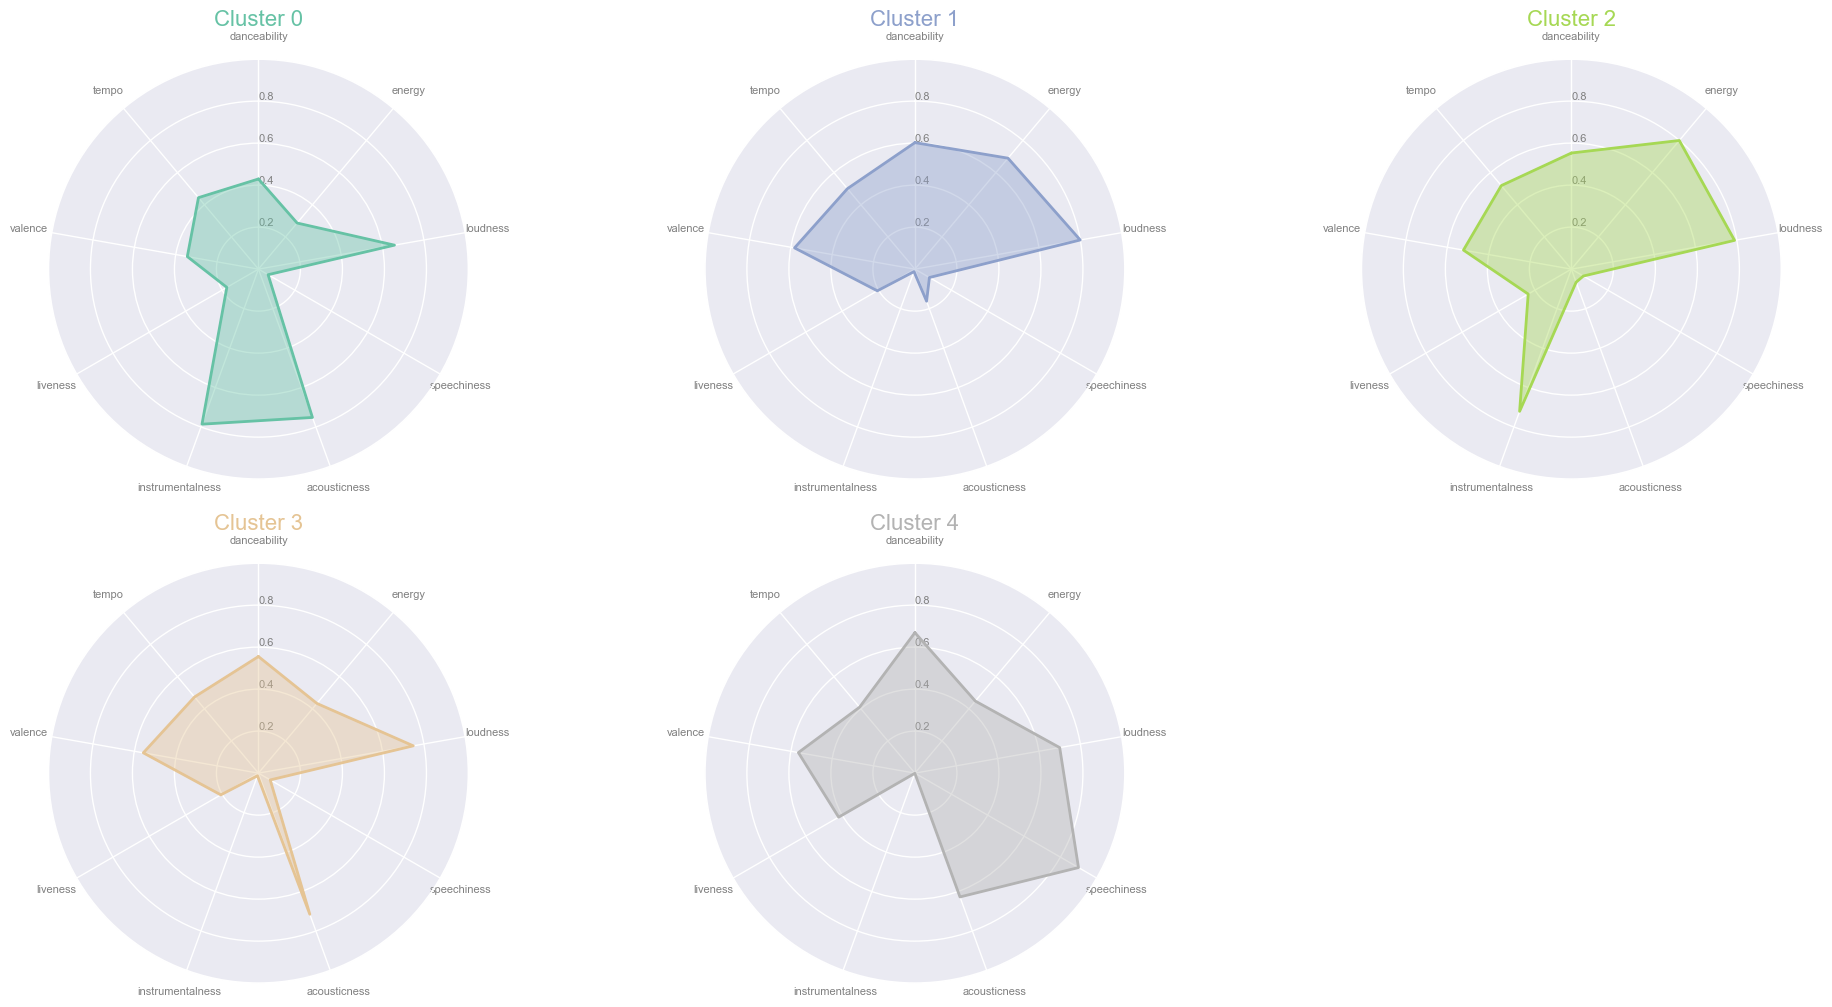

In [392]:
# ------- PART 2: Apply the function to all individuals
# initialize the figure

plt.figure(figsize=(24, 12))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(birch_radar_df.index))
 
# Loop to plot
for row in range(0, len(birch_radar_df.index)):
    make_spider(row=row, title='Cluster ' + str(birch_radar_df['cluster'][row]), color=my_palette(row))

## Visualizing Clusters w/ PCA

In [393]:
from sklearn.decomposition import PCA

In [394]:
birch_pca = PCA(n_components=3)
sample_catalog_pca = birch_pca.fit_transform(scaled_sample_catalog_df)
print(birch_pca.explained_variance_ratio_.sum())

0.9011194598302282


In [395]:
sample_pca_catalog_df = pd.DataFrame(sample_catalog_pca, columns=['C1', 'C2', 'C3'])
sample_pca_catalog_df['cluster'] = birch_model.labels_

In [401]:
# Undersample Clusters
# min value count in cluster = 7393
sampled_pca_birch_clusters = pd.DataFrame()

for c in sample_pca_catalog_df['cluster'].unique():
    sampled_pca_birch_clusters_df = sample_pca_catalog_df[sample_pca_catalog_df['cluster'] == c ].sample(n=7401)
    sampled_pca_birch_clusters = pd.concat([sampled_pca_birch_clusters, sampled_pca_birch_clusters_df], axis=0)

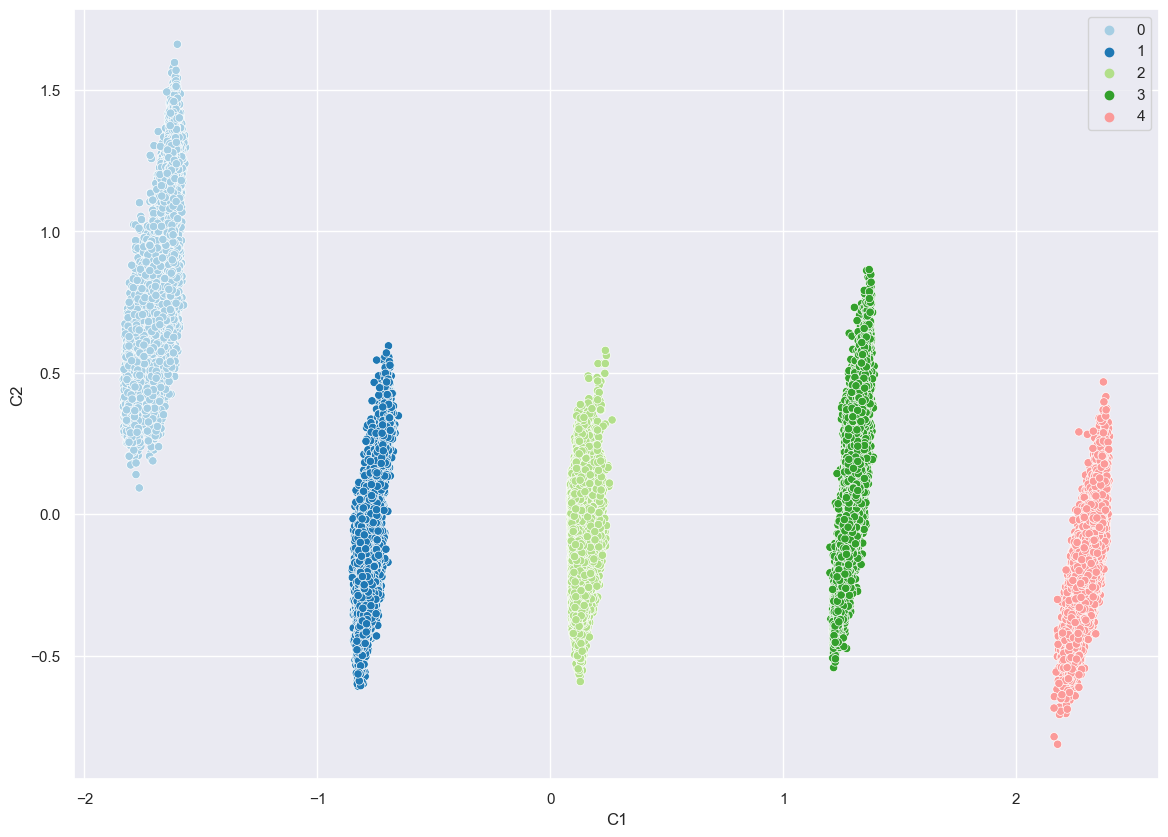

In [402]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_pca_birch_clusters, legend='full', palette='Paired')
plt.legend()

plt.show()

## Predicting User Clusters

In [403]:
bpred_user_1 = birch_model.predict(scaled_user_1)
bpred_user_2 = birch_model.predict(scaled_user_2)

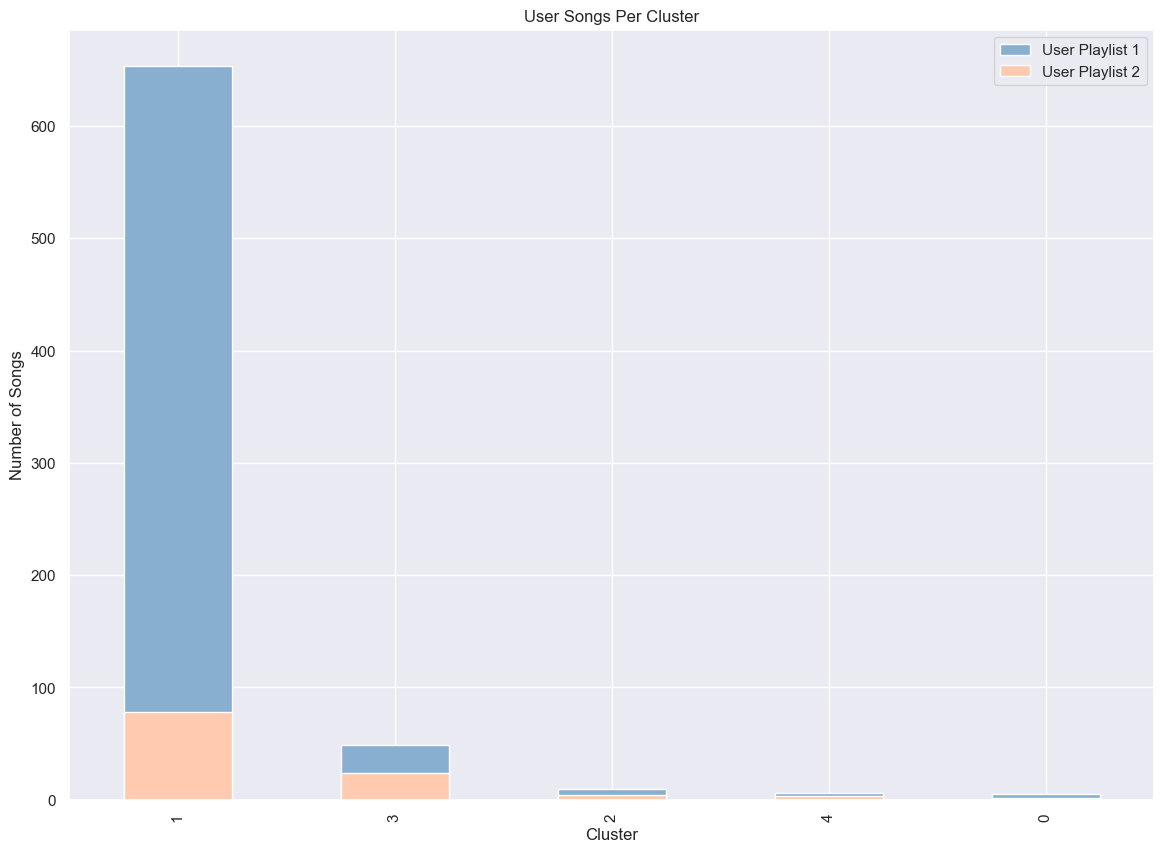

In [404]:
bcluster_user_1 = pd.DataFrame(scaled_user_1, columns=scaled_cluster_cols)
bcluster_user_1['cluster'] = bpred_user_1

bcluster_user_2 = pd.DataFrame(scaled_user_2, columns=scaled_cluster_cols)
bcluster_user_2['cluster'] = bpred_user_2

# Plot
bcluster_user_1['cluster'].value_counts().plot(kind='bar', color='#88aed0', label='User Playlist 1')
bcluster_user_2['cluster'].value_counts().plot(kind='bar', color='#ffcaaf', label='User Playlist 2')

plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('User Songs Per Cluster')
plt.legend()


plt.show()

In [405]:
print(bcluster_user_1['cluster'].value_counts())
print('\n')
print(bcluster_user_2['cluster'].value_counts())

1    653
3     49
2     10
4      6
0      5
Name: cluster, dtype: int64


1    78
3    24
2     4
4     3
0     2
Name: cluster, dtype: int64


In [406]:
bconcat_user_df1 = pd.concat([user_df1, bcluster_user_1], axis=1).set_index('cluster')
bconcat_user_df2 = pd.concat([user_df2, bcluster_user_2], axis=1).set_index('cluster')

# Print samples from each cluster
for cluster in range(birch_k):
    try:
        print("\nUser DF1")
        display(bconcat_user_df1.loc[cluster, ['name', 'artists']].sample(frac=1).head(5))
        print("\nUser DF2")
        display(bconcat_user_df2.loc[cluster, ['name', 'artists']].sample(frac=1).head(5))
    except KeyError:
        continue


User DF1


,name,artists
cluster,,
0,Punga,Klingande
0,Shine - Extended Mix,Linying
0,Changes,PNAU
0,Warm,SG Lewis
0,Oxas,De Hofnar



User DF2


,name,artists
cluster,,
0,Never Going Back Again - 2004 Remaster,Fleetwood Mac
0,Come Together - Remastered 2009,The Beatles



User DF1


,name,artists
cluster,,
1,Sun Comes Up (feat. James Arthur),James Arthur
1,Changes,Liquid Todd
1,Edge of Love (feat. Nevve),Nevve
1,Ocean Drive,Duke Dumont
1,Another Friend,Tep No



User DF2


,name,artists
cluster,,
1,Don't Stop Me Now - Remastered 2011,Queen
1,Billie Jean,Michael Jackson
1,Thriller,Michael Jackson
1,Free Bird,Lynyrd Skynyrd
1,You Make Loving Fun - 2004 Remaster,Fleetwood Mac



User DF1


,name,artists
cluster,,
2,Want You - Extended Mix,EDX
2,Prelude,Michael Calfan
2,Running Wild (Jayceeoh Remix),Britt Daley
2,Do It Tonight,Cedric Gervais
2,Come With Me,Nora En Pure



User DF2


,name,artists
cluster,,
2,Magic Carpet Ride,Steppenwolf
2,Jumpin' Jack Flash - Mono,The Rolling Stones
2,Layla,Derek & The Dominos
2,Bobcaygeon,The Tragically Hip



User DF1


,name,artists
cluster,,
3,Happy Now,Elley Duhé
3,A Different Way,Lauv
3,Closer,Halsey
3,Contact,Giang Pham
3,Bittersweet,Sofía Reyes



User DF2


,name,artists
cluster,,
3,Take It Easy - 2013 Remaster,Eagles
3,Stop Draggin' My Heart Around (with Tom Petty ...,Tom Petty and the Heartbreakers
3,Landslide,Fleetwood Mac
3,Maggie May,Rod Stewart
3,Your Song,Elton John



User DF1


,name,artists
cluster,,
4,Runaway,ChianoSky
4,Eastside (with Halsey & Khalid),Khalid
4,Gold,Kiiara
4,With You,Meghan Trainor
4,I Like Me Better,Lauv



User DF2


,name,artists
cluster,,
4,I Shot The Sheriff,The Wailers
4,Sympathy For The Devil - 50th Anniversary Edition,The Rolling Stones
4,I'm Still Standing,Elton John


## Song Recommendations

In [407]:
bconcat_user_df1.reset_index(inplace=True)
bconcat_user_df2.reset_index(inplace=True)

bdf1_cluster_pct = bconcat_user_df1['cluster'].value_counts(normalize=True) * 25
bdf2_cluster_pct = bconcat_user_df2['cluster'].value_counts(normalize=True) * 15

if int(bdf1_cluster_pct.round(0).sum()) < 25:
    bdf1_cluster_pct[df1_cluster_pct < 0.5] = bdf1_cluster_pct[bdf1_cluster_pct < 0.5] + 1.

if int(bdf2_cluster_pct.round(0).sum()) < 15:
    bdf2_cluster_pct[df2_cluster_pct < 0.5] = bdf2_cluster_pct[df2_cluster_pct < 0.5] + 1.

print("\nUser DF1")
print(bdf1_cluster_pct)
print("Total Songs DF1: {}".format(int(bdf1_cluster_pct.round(0).sum())))
print("\nUser DF2")
print(bdf2_cluster_pct)
print("Total Songs DF2: {}".format(int(bdf2_cluster_pct.round(0).sum())))


User DF1
1    22.579530
3     1.694329
2     0.345781
4     0.207469
0     0.172891
Name: cluster, dtype: float64
Total Songs DF1: 25

User DF2
1    10.540541
3     3.243243
2     0.540541
4     0.405405
0     0.270270
Name: cluster, dtype: float64
Total Songs DF2: 15


In [408]:
sample_concat_catalog_df.reset_index(inplace=True)

In [409]:
# Add cluster percentage to dataframe
bconcat_user_df1['cluster_pct'] = bconcat_user_df1['cluster'].apply(lambda c: bdf1_cluster_pct[c])
bconcat_user_df2['cluster_pct'] = bconcat_user_df2['cluster'].apply(lambda c: bdf2_cluster_pct[c])

In [410]:
playlist3 = pd.DataFrame()

for cluster, pct in bdf1_cluster_pct.items():
    songs3 = sample_concat_catalog_df[sample_concat_catalog_df['cluster'] == cluster].sample(n=int(round(pct, 0)))
    playlist3 = pd.concat([playlist3, songs3], ignore_index=True)
    if len(playlist3) > 25:
        flag = 25 - len(playlist3)
        playlist3 = playlist3[:flag]

playlist3.head(5)

,cluster,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,...,time_signature,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,1.0,2YIbA2F8JYghvPGa23xbx6,死結 - 八大戲劇 殘酷的愛 片尾曲,25.0,274653.0,['Nicky Lee'],['6DuHQk8gJbyVlhajer8IuF'],2008-08-01,0.497,0.413,...,4.0,0.184662,0.878,0.857746,0.057981,0.022088,0.000010,0.1840,0.465,0.708557
1,1.0,67171uKIjFr3TOVPn1y3cB,Brace Yourself - Mono,27.0,125919.0,['Ben E. King'],['3plJVWt88EqjvtuB4ZDRV3'],1962-08-20,0.582,0.630,...,4.0,0.508577,0.761,0.834465,0.045005,0.006305,0.000000,0.0892,0.884,0.478929
2,1.0,3gy8dl3NU6RSNRPfTCTex8,你並不懂我,37.0,235090.0,['By2'],['3DOs7Bsr9x4eJHqv6ViPvR'],2012-07-23,0.525,0.466,...,4.0,0.595358,0.857,0.838687,0.033574,0.261044,0.000005,0.1180,0.545,0.503407
3,1.0,2GKRTdzR1oPwX973ytUMBP,Аэроплан,18.0,167604.0,['Bravo'],['00pgSmUVlL9A4coAnjPayQ'],1994-01-01,0.656,0.853,...,4.0,0.510595,0.311,0.740394,0.027806,0.413655,0.000000,0.1160,0.128,0.596673
4,1.0,3ViX9oPP2ZVG2DsweSf5qp,落地開花,20.0,149000.0,['Candy Lo'],['51ZbCFgOspWvhBjd1DUYEV'],2003-09-27,0.590,0.454,...,3.0,0.621594,0.889,0.822657,0.049537,0.000695,0.000000,0.0855,0.773,0.471014


In [411]:
playlist4 = pd.DataFrame()

for cluster, pct in bdf2_cluster_pct.items():
    songs4 = sample_concat_catalog_df[sample_concat_catalog_df['cluster'] == cluster].sample(n=int(round(pct, 0)))
    playlist4 = pd.concat([playlist4, songs4], ignore_index=True)
    if len(playlist4) > 15:
        flag = 15 - len(playlist4)
        playlist4 = playlist4[:flag]

playlist4.head(5)

,cluster,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,...,time_signature,scaled_danceability,scaled_energy,scaled_loudness,scaled_speechiness,scaled_acousticness,scaled_instrumentalness,scaled_liveness,scaled_valence,scaled_tempo
0,1.0,3hJJNio101INBq5sktatlM,Canzone Quasi D'Amore - Live From Italy/1984 /...,31.0,221893.0,['Francesco Guccini'],['5Pa0BjjSDSiWuak0O1PbHL'],1998-01-01,0.434,0.297,...,4.0,0.637740,0.448,0.752707,0.052008,0.363454,0.000,0.1440,0.477,0.534838
1,1.0,3a9KUF4vPTRXMXTJuTlDrR,The Warmth of Magic,19.0,272200.0,['Azumi Inoue'],['3lG7z36cCcA64i1S4CBgqp'],1989-11-25,0.464,0.251,...,4.0,0.386478,0.599,0.833471,0.113285,0.197791,0.000,0.0747,0.419,0.662275
2,1.0,0M0hPIskg4OVC11rkp4Xnp,My Home,44.0,207320.0,['GOT7'],['6nfDaffa50mKtEOwR8g4df'],2016-09-27,0.435,0.884,...,4.0,0.616549,0.712,0.817624,0.457261,0.294177,0.000,0.2150,0.565,0.501508
3,1.0,6I1UzCrrmK87vEd2Sp2MTr,A Deus piachende,14.0,279333.0,['Tazenda'],['3iET9n0KDfyrTBmCFGZjnS'],1988-06-29,0.610,0.641,...,4.0,0.437941,0.897,0.817609,0.092997,0.058133,0.109,0.6900,0.346,0.519289
4,1.0,4gwplBNc2bzlieQbQ0L6PH,Cerveza del Olvido - En Vivo Desaguadero 2016,32.0,250520.0,['Grupo Eclipse'],['2Vs9qoWaU6MrLKPG3AakNf'],2016-11-12,0.337,0.837,...,4.0,0.605449,0.986,0.908606,0.072812,0.073394,0.000,0.3690,0.598,0.434546


In [412]:
cols = ['name', 'artists']

In [413]:
playlist3_songs = playlist3[cols]

display(playlist3_songs)

,name,artists
0,死結 - 八大戲劇 殘酷的愛 片尾曲,['Nicky Lee']
1,Brace Yourself - Mono,['Ben E. King']
2,你並不懂我,['By2']
3,Аэроплан,['Bravo']
4,落地開花,['Candy Lo']
5,Inward Harmony,['Marcey Hamm']
6,Kanashimi no Etranger,['Shizuka Kudo']
7,Bawalah Aku Bersamamu,['Dian Piesesha']
8,Aşiyan,['Akrep Nalan']
9,Starry Night - Original Mix,['Peggy Gou']


In [414]:
playlist4_songs = playlist4[cols]

display(playlist4_songs)

,name,artists
0,Canzone Quasi D'Amore - Live From Italy/1984 /...,['Francesco Guccini']
1,The Warmth of Magic,['Azumi Inoue']
2,My Home,['GOT7']
3,A Deus piachende,['Tazenda']
4,Cerveza del Olvido - En Vivo Desaguadero 2016,['Grupo Eclipse']
5,Hermano Te Estoy Hablando,['Jaime Roos']
6,"Mrs. Robinson - Live at Central Park, New York...",['Simon & Garfunkel']
7,Es Tan Bello,['Intocable']
8,Blue Lights In My Eyes,['Pussycat']
9,Niemand Kan Ons Toch Scheiden,['Corry en de Rekels']
